<a href="https://colab.research.google.com/github/TruongVanDuc19146177/AI/blob/main/nhandien_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ket noi voi drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/dataAI/money/train',target_size=(150,150), batch_size=32, class_mode='categorical')
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/dataAI/money/validation',target_size=(150,150), batch_size=32, class_mode='categorical')
validation.class_indices

Found 440 images belonging to 11 classes.
Found 79 images belonging to 11 classes.


{'1000': 0,
 '100k': 1,
 '10k': 2,
 '200': 3,
 '2000': 4,
 '200k': 5,
 '20k': 6,
 '500': 7,
 '5000': 8,
 '500k': 9,
 '50k': 10}

In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=400,batch_size=64,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/400
14/14 [==============================] - 181s 12s/step - loss: 3.1754 - accuracy: 0.0795 - val_loss: 2.3951 - val_accuracy: 0.0506
Epoch 2/400
14/14 [==============================] - 12s 869ms/step - loss: 2.4005 - accuracy: 0.0886 - val_loss: 2.3917 - val_accuracy: 0.0886
Epoch 3/400
14/14 [==============================] - 12s 851ms/step - loss: 2.3883 - accuracy: 0.1045 - val_loss: 2.3527 - val_accuracy: 0.1646
Epoch 4/400
14/14 [==============================] - 12s 851ms/step - loss: 2.2990 - accuracy: 0.1591 - val_loss: 2.1414 - val_accuracy: 0.2405
Epoch 5/400
14/14 [==============================] - 12s 858ms/step - loss: 2.1145 - accuracy: 0.2114 - val_loss: 1.9581 - val_accuracy: 0.3544
Epoch 6/400
14/14 [==============================] - 12s 884ms/step - loss: 1.9456 - accuracy: 0.2227 - val_loss: 1.8309 - val_accuracy: 0.2532
Epoch 7/400
14/14 [==============================] - 12s 869ms/step - loss: 1.7907 - accuracy: 0.2636 - val_loss: 1.7347 - val_accuracy: 

In [7]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.09170790761709213
Train Accuracy 0.9750000238418579


<function matplotlib.pyplot.show>

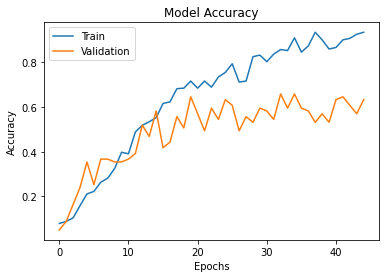

In [8]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [9]:
# Lưu lại
model.save("Money.h5")

In [10]:
# Tải mô hình 
model_CNN=load_model('Money.h5')

mệnh giá 10.000đ


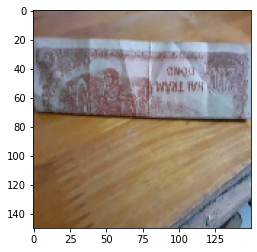

mệnh giá 500đ


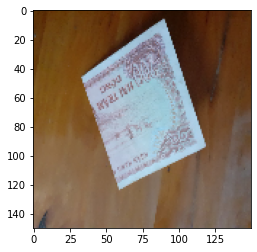

mệnh giá 2.000đ


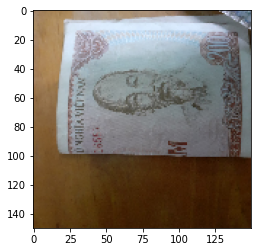

mệnh giá 20.000đ


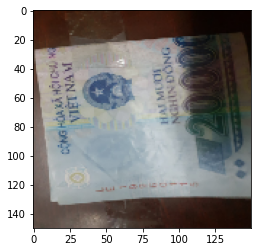

mệnh giá 1000đ


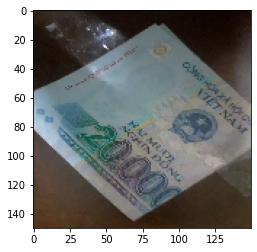

mệnh giá 20.000đ


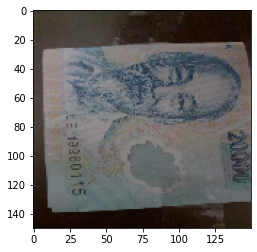

mệnh giá 200.000đ


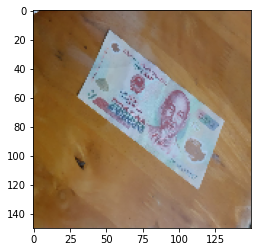

mệnh giá 200.000đ


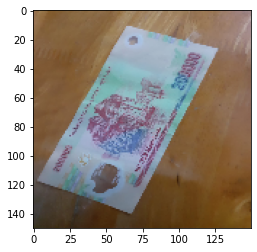

mệnh giá 200.000đ


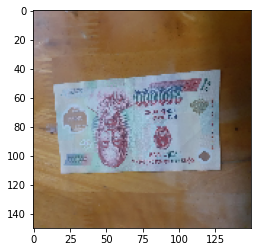

mệnh giá 1000đ


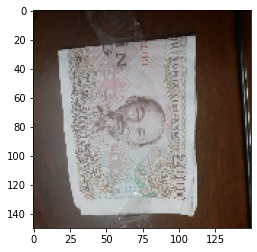

mệnh giá 1000đ


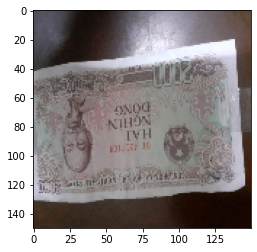

mệnh giá 2.000đ


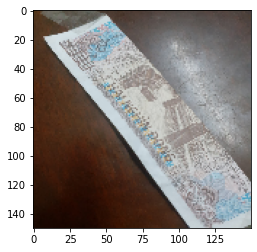

mệnh giá 5.000đ


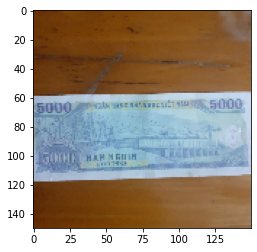

mệnh giá 500đ


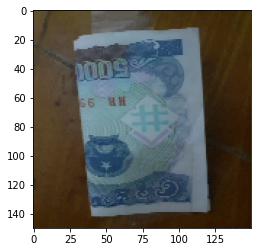

mệnh giá 5.000đ


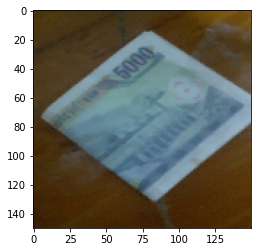

mệnh giá 500.000đ


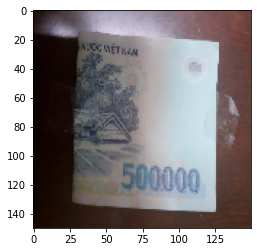

mệnh giá 500.000đ


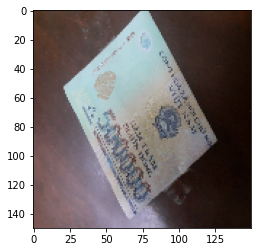

mệnh giá 500.000đ


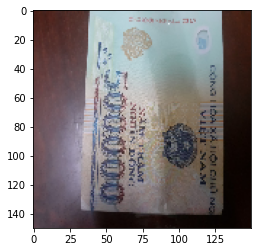

mệnh giá 50.000đ


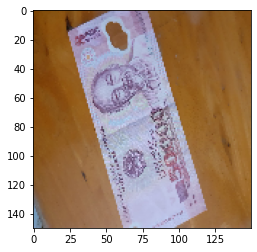

mệnh giá 50.000đ


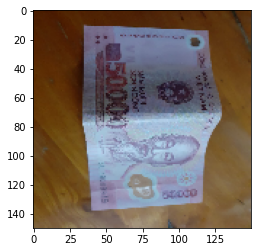

mệnh giá 50.000đ


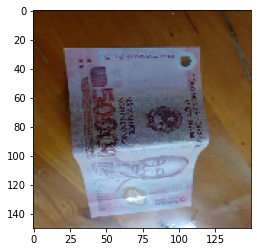

mệnh giá 500đ


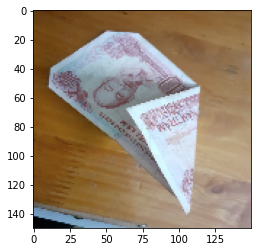

mệnh giá 500đ


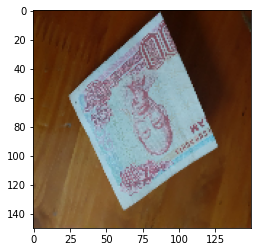

mệnh giá 200đ


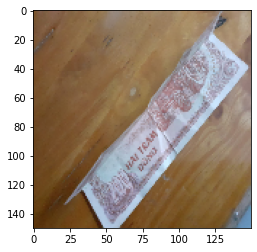

mệnh giá 10.000đ


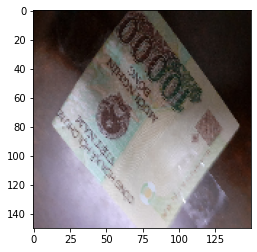

mệnh giá 10.000đ


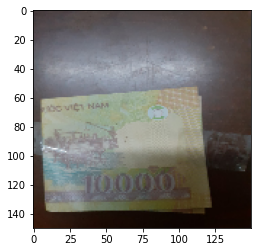

mệnh giá 100.000đ


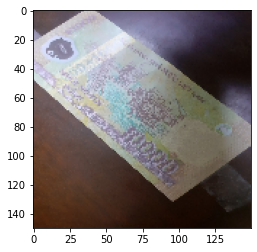

mệnh giá 100.000đ


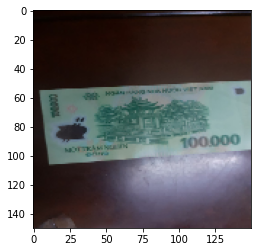

mệnh giá 100.000đ


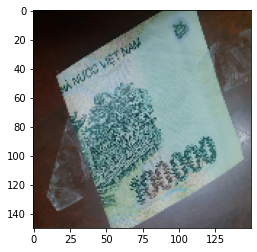

mệnh giá 10.000đ


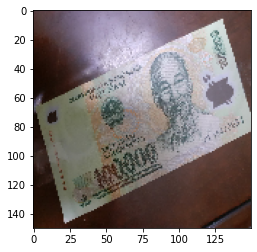

mệnh giá 1000đ


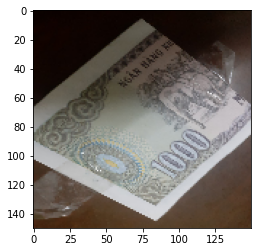

mệnh giá 1000đ


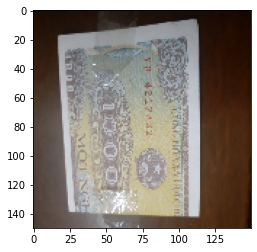

mệnh giá 1000đ


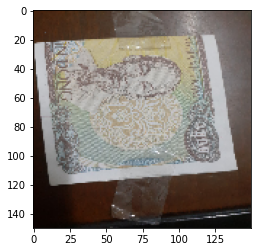

In [11]:
test="/content/drive/MyDrive/dataAI/money/test"
for i in os.listdir(test):
  test_i = test+'/'+i
  for j in os.listdir(test_i):
    link = test_i+'/'+j
    img=load_img(link,target_size=(150,150))
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='mệnh giá 1000đ'
    if round(result[0][1])==1:
      prediction='mệnh giá 100.000đ'
    if round(result[0][2])==1:
      prediction='mệnh giá 10.000đ'
    if round(result[0][3])==1:
      prediction='mệnh giá 200đ'
    if round(result[0][4])==1:
      prediction='mệnh giá 2.000đ'
    if round(result[0][5])==1:
      prediction='mệnh giá 200.000đ'
    if round(result[0][6])==1:
      prediction='mệnh giá 20.000đ'
    if round(result[0][7])==1:
      prediction='mệnh giá 500đ'
    if round(result[0][8])==1:
      prediction='mệnh giá 5.000đ'
    if round(result[0][9])==1:
      prediction='mệnh giá 500.000đ'
    if round(result[0][10])==1:
      prediction='mệnh giá 50.000đ'
    print(prediction)
    plt.show()